# Data treatment and Neural Network Training using IPMA data
João Oliveira and Edgar Mendes

In [1]:
#--------Criação das pastas de 0 a 100

import os

for i in range(101):
    os.mkdir(str(i)) #---Cria as pastas do 0 ao 100
print("Pastas criadas!")

Pastas criadas!


In [1]:
#--------Pedido dos dados

import requests
import json

DADOS_ULTIMAS_3_HORAS = "https://api.ipma.pt/open-data/observation/meteorology/stations/obs-surface.geojson" #por exemplo se forem 9PM tem os dados entre 5PM e 7PM de hora a hora para todas as estações

#https://www.educative.io/answers/how-to-make-api-calls-in-python
class make_api_call:
    def get_data(self, api):
        response = requests.get(f"{api}")
        if response.status_code == 200:
            print("sucessfully fetched the data")
            return response.json()
        else:
            print(f"Hello there, there's a {response.status_code} error with your request")
            
#---Define a função que vai transformar o valor da precipatação para um valor de 0 a 100
#---https://www.ipma.pt/pt/oclima/extremos.clima/ Vou usar o valor máximo aqui como referencia

def normalize_precipitation_value(precipitation_value):
  return int(round((precipitation_value/240)*100,0)) #o valor normalizado ta a ser arredondado pq as pastas sao de valores inteiros

In [5]:
api_call_instance = make_api_call()
full_json_array = api_call_instance.get_data(DADOS_ULTIMAS_3_HORAS)

sucessfully fetched the data


In [15]:
#--------Tratamento dos dados


# Extrai apenas os atributos relevantes e guarda numa lista
selected_attributes = []

for feature in full_json_array['features']:
    idEstacao = feature['properties']['idEstacao']
    localEstacao = feature['properties']['localEstacao']
    precAcumulada = feature['properties']['precAcumulada']
    horario = feature['properties']['time']
    # Cria um dicionario e guarda lá os valores selecionados
    selected_attributes.append({'idEstacao': idEstacao, 'horario': horario, 'localEstacao': localEstacao, 'precAcumuladaNormalizada' : normalize_precipitation_value(max(0, precAcumulada))})

# Para ver uma listagem de todos atributos
print(json.dumps(selected_attributes, indent=2))

# Para ver uma listagem de um único atributo 
#horario_array = [item["horario"] for item in selected_attributes]
#print(json.dumps(horario_array, indent=2))

[
  {
    "idEstacao": 1200501,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "Flores (Aeroporto)",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200502,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "Corvo (Aer\u00f3dromo)",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200504,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "Pico (Aer\u00f3dromo)",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200506,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "Horta (Obs. Pr\u00edncipe Alberto M\u00f3naco)",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200507,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "Graciosa (Aer\u00f3dromo)",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200510,
    "horario": "2023-04-06T08:00:00",
    "localEstacao": "S\u00e3o Jorge",
    "precAcumuladaNormalizada": 0
  },
  {
    "idEstacao": 1200511,
    "horario": "2023-04-06T08:00:00"

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0710.


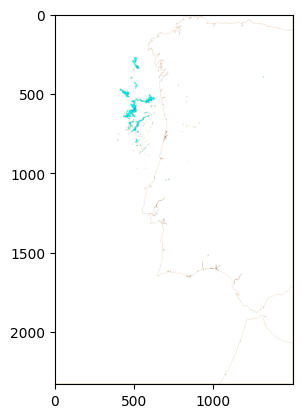

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0720.


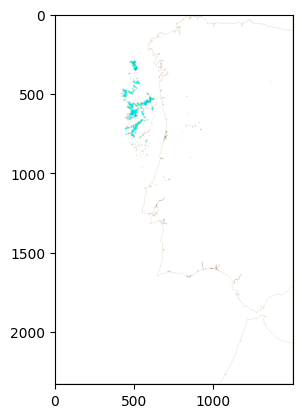

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0730.


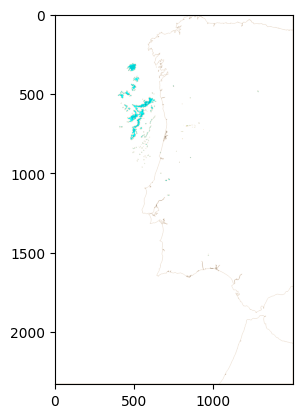

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0740.


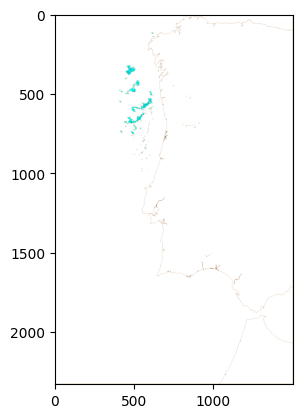

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0750.


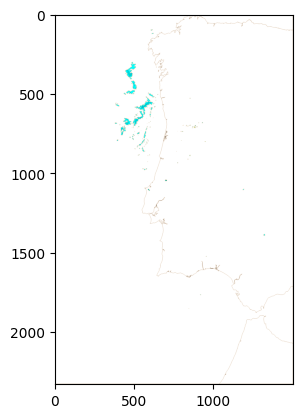

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0800.


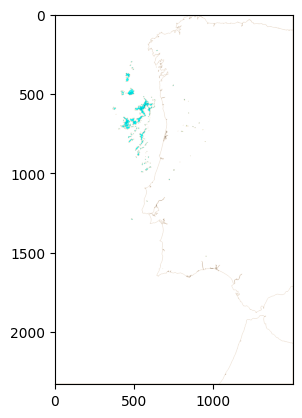

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0810.


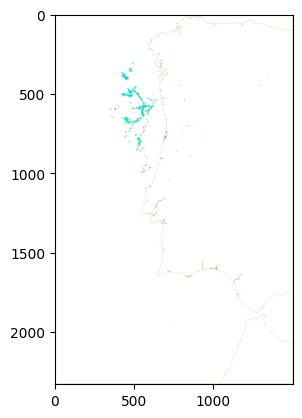

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0820.


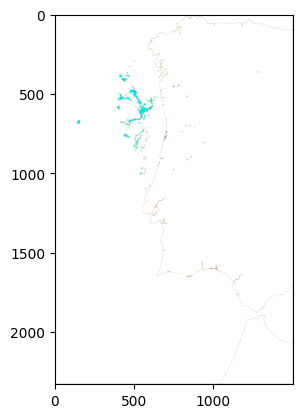

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0830.


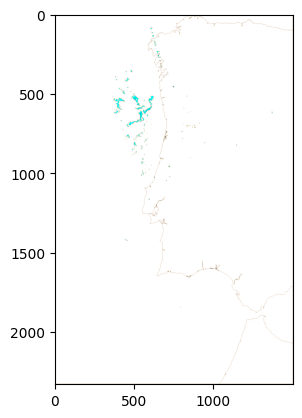

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0840.


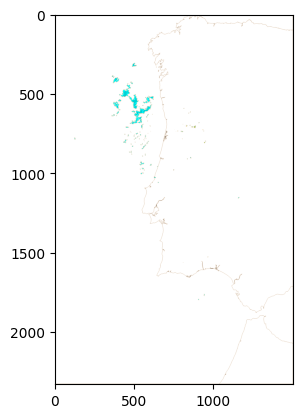

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0850.


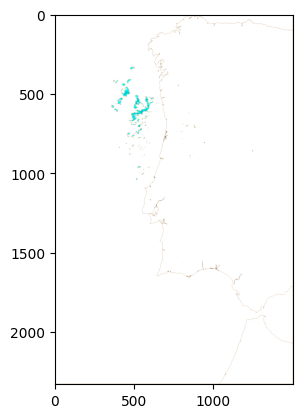

----------------------------------------------------------------
Imagem do radar de 2023-04-06 0900.


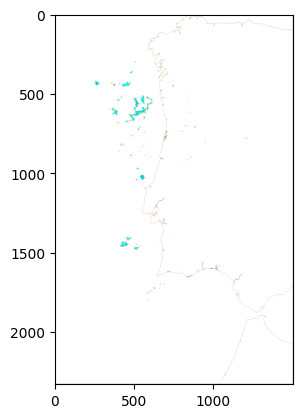

In [3]:
#--------Pedido das imagens

import requests
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
from io import BytesIO

start_time = datetime(2023, 4, 6, 9, 0) # Data que se pretende buscar as imagens (YYYY, M, D, H, Min)
end_time = start_time - timedelta(hours=2) # Data de 2 horas atrás
min_inter = 10 # Intervalo entre as imagens (5 ou 10) min

folder_name = start_time.strftime('%Y-%m-%d') # Nome do ficheiro para guardar as imagens

# Se o ficheiro não existir, cria um novo
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

while start_time > end_time:
    # url com o formato desejado
    url = f"https://www.ipma.pt/resources.www/transf/radar/por/pcr-{start_time.strftime('%Y-%m-%d')}T{start_time.strftime('%H%M')}.png"
    response = requests.get(url)
    file_name = f"{folder_name}/{start_time.strftime('%Y-%m-%d_%H%M')}.png" # Caminho e nome da imagem
    # Se a imagem não existir, guarda no caminho
    if not os.path.exists(file_name):
        with open(file_name, "wb") as f:
            f.write(response.content)
    start_time -= timedelta(minutes=min_inter)

# Lê os ficheiros da pasta
files = os.listdir(folder_name)
files.sort()

# Mostra todas as imagens do ficheiro
for file in files:
    if file.endswith(".png"):
        print('-' * 64)
        img = plt.imread(os.path.join(folder_name, file))
        print(f"Imagem do radar de {file[:16].replace('_', ' ')}")
        plt.imshow(img)
        plt.show()

(x1, y1, x2, y2) => (834, 1488, 1034, 1688)


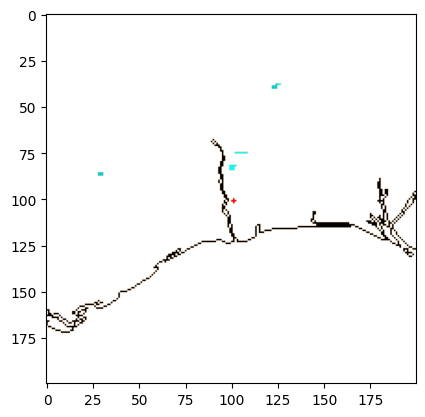

In [16]:
#--------Código auxiliar para o corte das regiões para a análise 

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Coordenadas da imagem (aproximação)
lat1, long1 = 43.95, -12.453377201650959
lat2, long2 = 34, -4.348615353313684

# Carrega a imagem
img = Image.open("2023-04-06/2023-04-06_0900.png")
dist = 200

# Coordenadas do ponto de corte (coordenadas da estação)
#lat_corte, long_corte = 41.87137319097221, -8.873543416570248
lat_corte, long_corte = 37.16925866835189, -7.40364787889199

# Calcula as coordenadas do canto superior esquerdo do corte 
x = int(img.width * (long_corte - long1) / (long2 - long1) - (dist/2))
y = int(img.height * (lat_corte - lat1) / (lat2 - lat1) - (dist/2))
print(f'(x1, y1, x2, y2) => ({x}, {y}, {x + dist}, {y + dist})') # Mostra onde a imagem foi cortada (x1, y1, x2, y2)

# Desenha um ponto vermelho no centro da imagem
draw = ImageDraw.Draw(img)
draw.ellipse((x+(dist/2), y+(dist/2), x+((dist/2)+2), y+((dist/2)+2)), fill='red')

# Faz o corte de (dist x dist) pixels
corte = img.crop((x, y, x+dist, y+dist))

# Mostra a imagem cortada
plt.imshow(corte)
plt.show()

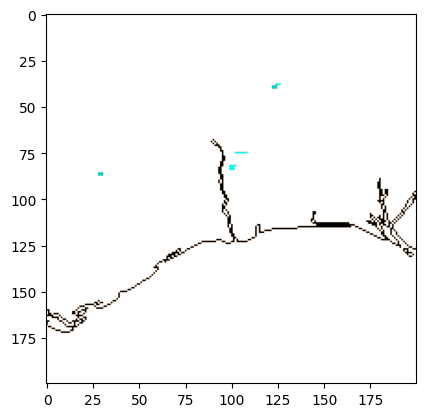

In [14]:
#--------Código teste do corte das imagens

from PIL import Image

# Carrega a imagem do IPMA
img = Image.open("2023-04-06/2023-04-06_0900.png")

# Define as coordenadas da região de Viana do Castelo (x1, y1, x2, y2) (1500x2331)
box = (834, 1488, 1034, 1688) # esses valores foram escolhidos por testes

# Corta a imagem na região definida pelas coordenadas
region = img.crop(box)

# Mostra a imagem cortada
plt.imshow(region)
plt.show()

In [3]:
#--------Corta várias imagens??

import requests
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

start_time = datetime(2023, 4, 3, 21, 0)
end_time = start_time - timedelta(hours=3)
min_inter = 10

folder_name = start_time.strftime('%Y-%m-%d')

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

while start_time > end_time:
    url = f"https://www.ipma.pt/resources.www/transf/radar/por/pcr-{start_time.strftime('%Y-%m-%d')}T{start_time.strftime('%H%M')}.png"
    response = requests.get(url)
    file_name = f"{folder_name}/{start_time.strftime('%Y-%m-%d_%H%M')}.png"
    if not os.path.exists(file_name):
        with open(file_name, "wb") as f:
            f.write(response.content)
    start_time -= timedelta(minutes=min_inter)

files = os.listdir(folder_name)
files.sort()

for file in files:
    if file.endswith(".png"):
        print('-' * 64)
        img = Image.open(os.path.join(folder_name, file))
        print(f"Imagem do radar de {file[:16].replace('_', ' ')}")
        
        # Define as coordenadas da região de Viana do Castelo (x1, y1, x2, y2) (1500x2331)
        box = (600, 475, 750, 575)

        # Corta a imagem na região definida pelas coordenadas
        region = img.crop(box)

        # Mostra a imagem cortada
        plt.imshow(region)
        plt.show()

In [18]:
#------Esta função guarda num dicionario os valores da percipitação das ulimas 3 horas numa certa estacao
#------Falta fazer: por isso a guardar de todas as estações e depois num ficheiro

 

get_percipitation_values(selected_attributes,1240610)

{'2023-04-06T08:00:00': 0, '2023-04-06T09:00:00': 0, '2023-04-06T10:00:00': 0}

#  API precipition information

In [19]:
# Código para guardar a precipitação de cada hora de uma x estação

import requests
import json
from datetime import datetime
import os

# Faz a requisição à apiEstacoes
url_estacoes = "https://api.ipma.pt/open-data/observation/meteorology/stations/stations.json"
response_estacoes = requests.get(url_estacoes)
response_estacoes.raise_for_status()  # Verifica se há erros na resposta

# Obtém a idEstacao da estação em Viana do Castelo
json_estacoes = response_estacoes.json()
id_estacao = next((estacao['properties']['idEstacao'] for estacao in json_estacoes if estacao['properties']['localEstacao'] == 'Viana do Castelo'), None)
if id_estacao is None:
    print("Estação não encontrada")
    exit()

# Faz a requisição à apiMeteo para obter as informações meteorológicas da estação em Viana do Castelo
url_meteo = "https://api.ipma.pt/open-data/observation/meteorology/stations/obs-surface.geojson"
response_meteo = requests.get(url_meteo)
response_meteo.raise_for_status()  # Verifica se há erros na resposta
data = response_meteo.json()

final_result = {}
for feature in data['features']:
    station_data = feature['properties']
    if station_data['idEstacao'] == id_estacao:
        date_str, hour_str = datetime.fromisoformat(station_data['time']).strftime('%Y-%m-%d %H:%M').split()
        precipitation = station_data['precAcumulada']
        
        if date_str not in final_result:
            final_result[date_str] = {hour_str: precipitation}
        else:
            final_result[date_str][hour_str] = precipitation

# Verifica se o arquivo JSON para esta estação já existe, se não, cria o arquivo
filename = f"dataset/precipitation/{id_estacao}.json"
if not os.path.isfile(filename):
    with open(filename, 'w') as file:
        json.dump({}, file)

# Carrega o conteúdo do arquivo JSON para a variável "precipitation_data"
with open(filename, 'r') as file:
    precipitation_data = json.load(file)

# Adiciona as informações meteorológicas ao arquivo JSON
for date in final_result:
    if date not in precipitation_data:
        precipitation_data[date] = final_result[date]
    else:
        precipitation_data[date].update(final_result[date])

# Escreve o conteúdo atualizado no arquivo JSON
with open(filename, 'w') as file:
    json.dump(precipitation_data, file)

print("Dados atualizados com sucesso!")

Dados atualizados com sucesso!


In [ ]:
# ******** Ainda em processo de desenvolvimento ********

# Código para guardar a precipitação de cada hora de uma x estação de hora em hora
import requests
import json
from datetime import datetime
import os
import schedule
import time

def run_script():
    # Coloque aqui o seu código que deve ser executado a cada hora
    print("Executando o script...")
    
    # Faz a requisição à apiEstacoes
    url_estacoes = "https://api.ipma.pt/open-data/observation/meteorology/stations/stations.json"
    response_estacoes = requests.get(url_estacoes)
    response_estacoes.raise_for_status()  # Verifica se há erros na resposta

    # Obtém a idEstacao da estação em Viana do Castelo
    json_estacoes = response_estacoes.json()
    id_estacao = next((estacao['properties']['idEstacao'] for estacao in json_estacoes if estacao['properties']['localEstacao'] == 'Viana do Castelo'), None)
    if id_estacao is None:
        print("Estação não encontrada")
        exit()

    # Faz a requisição à apiMeteo para obter as informações meteorológicas da estação em Viana do Castelo
    url_meteo = "https://api.ipma.pt/open-data/observation/meteorology/stations/obs-surface.geojson"
    response_meteo = requests.get(url_meteo)
    response_meteo.raise_for_status()  # Verifica se há erros na resposta
    data = response_meteo.json()

    final_result = {}
    for feature in data['features']:
        station_data = feature['properties']
        if station_data['idEstacao'] == id_estacao:
            date_str, hour_str = datetime.fromisoformat(station_data['time']).strftime('%Y-%m-%d %H:%M').split()
            precipitation = station_data['precAcumulada']

            if date_str not in final_result:
                final_result[date_str] = {hour_str: precipitation}
            else:
                final_result[date_str][hour_str] = precipitation

    # Verifica se o arquivo JSON para esta estação já existe, se não, cria o arquivo
    filename = f"dataset/precipitation/{id_estacao}.json"
    if not os.path.isfile(filename):
        with open(filename, 'w') as file:
            json.dump({}, file)

    # Carrega o conteúdo do arquivo JSON para a variável "precipitation_data"
    with open(filename, 'r') as file:
        precipitation_data = json.load(file)

    # Adiciona as informações meteorológicas ao arquivo JSON
    for date in final_result:
        if date not in precipitation_data:
            precipitation_data[date] = final_result[date]
        else:
            precipitation_data[date].update(final_result[date])

    # Escreve o conteúdo atualizado no arquivo JSON
    with open(filename, 'w') as file:
        json.dump(precipitation_data, file)

    print("Dados atualizados com sucesso!")

# Agendando a execução do script para ocorrer a cada uma hora
schedule.every().hour.do(run_script)

# Loop infinito que verifica se há tarefas agendadas para serem executadas
while True:
    schedule.run_pending()  # Executa as tarefas agendadas
    time.sleep(1)  # Espera um segundo antes de verificar novamente